# Descriptive Statistics

Nama: Windy Mega Melani
<br>
Code: PYTN-KS04-003
<br>
Python for Data Science

## Calculating Descriptive Statistics

In [3]:
# Memasukkan library yang sesuai
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [4]:
# Membuat beberapa data
x=[8.0,1,2.2,4,33.0]
x_with_nan=[8.0,1,2.2,4,math.nan,33.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.2, 4, 33.0]
[8.0, 1, 2.2, 4, nan, 33.0]


In [5]:
# Membuat objek np.ndarray dan pd.Series yang sesuai dengan x dan x_with_nan
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.2  4.  33. ]
[ 8.   1.   2.2  4.   nan 33. ]
0     8.0
1     1.0
2     2.2
3     4.0
4     NaN
5    33.0
dtype: float64


## Measures of Central Tendency

### Mean

Berbagai cara untuk mencari dan menampilkan nilai mean

In [6]:
mean_ = sum(x)/len(x)
mean_

9.64

In [7]:
mean_ = statistics.mean(x)
print(mean_)

9.64


In [8]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [9]:
mean_ = np.mean(y)
mean_

9.64

In [10]:
mean_ = y.mean()
mean_

9.64

In [11]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [12]:
np.nanmean(y_with_nan)

9.64

In [14]:
mean_ = z.mean()
mean_

9.64

In [15]:
z_with_nan.mean()

9.64

### Weighted Mean

In [16]:
x=[8.0,1,2.2,4,33.0]
w=[0.1,2,0.3,4,0.5]

wmean = sum(w[i]*x[i] for i in range(len(x)))/sum(w)
print(wmean)

wmean=sum(x_ * w_ for (x_,w_) in zip(x,w))/sum(w)
print(wmean)

5.21159420289855
5.21159420289855


In [18]:
y,z,w = np.array(x), np.array(w), pd.Series(x)

wmean=np.average(y, weights=w)
print(wmean)

wmean=np.average(z, weights=w)
print(wmean)

24.374273858921157
24.374273858921157


### Harmonic Mean

In [19]:
hmean = len(x)/sum(1/item for item in x)
hmean

2.6883910386965377

In [21]:
hmean = statistics.harmonic_mean(x)
hmean

2.6883910386965377

In [22]:
scipy.stats.hmean(y)

2.6883910386965377

In [23]:
scipy.stats.hmean(z)

2.6883910386965377

### Geometric Mean

In [24]:
gmean=1
for item in x:
    gmean *= item
    
gmean **= 1/len(x)
gmean

4.712130611744106

In [25]:
scipy.stats.gmean(y)

4.712130611744104

In [26]:
scipy.stats.gmean(z)

4.712130611744104

### Median

In [27]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index=sorted(x), round(0.5*n)
    median_ = 0.5*(x_ord[index-1]+x_ord[index])
    
median_

4

In [28]:
x

[8.0, 1, 2.2, 4, 33.0]

statistics.median_low(x[:-1])

In [30]:
statistics.median_high(x[:-1])

4

In [32]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [33]:
median_ = np.median(y)
print(median_)

4.0


In [34]:
median_ = np.median(y[:-1])
print(median_)

3.1


### Mode

In [37]:
u = [567,234,567,456,567]
v = [111,222,222,444,222]

mode_ = max((u.count(item),item) for item in set(u))[1]
mode_

567

In [38]:
mode_ = statistics.mode(u)
mode_

567

In [39]:
u,v=np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([567]), count=array([3]))

In [40]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([222]), count=array([3]))

In [41]:
print(mode_.mode)
print(mode_.count)

[222]
[3]


In [42]:
u,v,w = pd.Series(u), pd.Series(v), pd.Series([2,2,math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    567
dtype: int32
0    222
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

### Variance

In [43]:
n = len(x)
mean_ = sum(x)/n

var_ = sum((item-mean_)**2 for item in x)/(n-1)
var_

177.548

In [44]:
var_ = statistics.variance(x)
var_

177.54799999999997

In [45]:
var_ = np.var(y, ddof=1)
var_

177.548

In [46]:
var_ = y.var(ddof=1)
var_

177.548

In [47]:
z.var(ddof=1)

177.548

### Standard Deviation

In [48]:
std_ = var_ ** 0.5
std_

13.324713880605467

In [50]:
std_ = statistics.stdev(x)
std_

13.324713880605465

In [51]:
np.std(y, ddof=1)

13.324713880605467

In [52]:
y.std(ddof=1)

13.324713880605467

In [53]:
z.std(ddof=1)

13.324713880605467

### Skewness

In [56]:
n = len(x)

mean_ = sum(x)/n
var_ = sum((item-mean_)**2 for item in x)/(n-1)
std_ = var_ ** 0.5

skew_ = (sum((item-mean_)**3 for item in x)*n/((n-1)*(n-2)*std_**3))

In [57]:
skew_

2.0265878899245715

In [58]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

2.0265878899245715

In [59]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [61]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

2.0265878899245715

In [62]:
z_with_nan.skew()

2.0265878899245715

### Percentiles

In [63]:
x = [-5.0, -1.2, 0.1, 2.2, 12.0, 24.0, 25.6, 31.2]
statistics.quantiles(x, n=2)

[7.1]

In [64]:
statistics.quantiles(x, n=4, method='inclusive')

[-0.22499999999999998, 7.1, 24.4]

In [65]:
y = np.array(x)
np.percentile(y,5)

-3.67

In [66]:
np.percentile(y,95)

29.24

In [67]:
np.percentile(y, [25,50,75])

array([-0.225,  7.1  , 24.4  ])

In [68]:
np.median(y)

7.1

In [69]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.2,  nan,  0.1,  2.2, 12. , 24. , 25.6, 31.2])

In [70]:
np.nanpercentile(y_with_nan, [25,50,75])

array([-0.225,  7.1  , 24.4  ])

In [71]:
np.quantile(y,0.05)

-3.67

In [72]:
np.quantile(y,0.95)

29.24

In [73]:
np.quantile(y,[0.25,0.5,0.75])

array([-0.225,  7.1  , 24.4  ])

In [74]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.67

In [75]:
z.quantile(0.95)

29.24

In [78]:
z.quantile([0.25,0.5,0.75])

0.25    -0.225
0.50     7.100
0.75    24.400
dtype: float64

In [79]:
z_with_nan.quantile([0.25,0.5,0.75])

0.25    -0.225
0.50     7.100
0.75    24.400
dtype: float64

### Ranges

In [80]:
np.ptp(y)

36.2

In [81]:
np.ptp(z)

36.2

In [82]:
np.ptp(y_with_nan)

nan

In [83]:
np.ptp(z_with_nan)

nan

In [84]:
np.amax(y) - np.amin(y)

36.2

In [87]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

36.2

In [88]:
y.max() - y.min()

36.2

In [89]:
z.max() - z.min()

36.2

In [90]:
z_with_nan.max() - z_with_nan.min()

36.2

In [91]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1]-quartiles[0]

24.625

In [93]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75]-quartiles[0.25]

24.625

## Summary of Descriptive Statistics

In [94]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=8, minmax=(-5.0, 31.2), mean=11.112499999999999, variance=198.88410714285712, skewness=0.35275182552297357, kurtosis=-1.9021712415958811)

In [95]:
result.nobs

8

In [96]:
result.minmax[0]

-5.0

In [97]:
result.minmax[1]

31.2

In [98]:
result.mean

11.112499999999999

In [99]:
result.variance

198.88410714285712

In [100]:
result.skewness

0.35275182552297357

In [101]:
result.kurtosis

-1.9021712415958811

In [102]:
result = z.describe()
result

count     8.000000
mean     11.112500
std      14.102628
min      -5.000000
25%      -0.225000
50%       7.100000
75%      24.400000
max      31.200000
dtype: float64

In [103]:
result['mean']

11.1125

In [104]:
result['std']

14.102627668021913

In [105]:
result['min']

-5.0

In [106]:
result['max']

31.2

In [108]:
result['25%']

-0.225

In [109]:
result['50%']

7.1

In [111]:
result['75%']

24.4

## Measures of Correlation Between Pairs of Data

In [119]:
x = list(range(-10,14))
y = [0,2,2,2,2,2,3,3,4,5,7,7,7,5,5,6,6,6,9,9,10,11,12,14]
x_, y_ = np.array(x), np.array(y)
x__,y__ = pd.Series(x_), pd.Series(y_)

### Covariance

In [120]:
n = len(x)
mean_x, mean_y = sum(x)/n, sum(y)/n
cov_xy = (sum((x[k]-mean_x)*(y[k]-mean_y)for k in range(n))/(n-1))
cov_xy

23.97826086956522

In [121]:
cov_matrix = np.cov(x_,y_)
cov_matrix

array([[50.        , 23.97826087],
       [23.97826087, 13.12862319]])

In [122]:
x_.var(ddof=1)

50.0

In [123]:
y_.var(ddof=1)

13.128623188405793

In [124]:
cov_xy = cov_matrix[0,1]
cov_xy

23.978260869565215

In [125]:
cov_xy = cov_matrix[1,0]
cov_xy

23.978260869565215

In [126]:
cov_xy = x__.cov(y__)
cov_xy

23.978260869565215

In [127]:
cov_xy = y__.cov(x__)
cov_xy

23.978260869565215

### Correlation Coefficient

In [128]:
var_x = sum((item-mean_x)**2 for item in x)/ (n-1)
var_y = sum((item-mean_y)**2 for item in y)/ (n-1)

std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.9358862933330906

In [129]:
r, p = scipy.stats.pearsonr(x_,y_)
r

0.9358862933330907

In [130]:
p

1.9238867792908738e-11

In [131]:
corr_matrix = np.corrcoef(x_,y_)
corr_matrix

array([[1.        , 0.93588629],
       [0.93588629, 1.        ]])

In [132]:
r = corr_matrix[0,1]
r

0.9358862933330907

In [133]:
r = corr_matrix[1,0]
r

0.9358862933330907

In [134]:
scipy.stats.linregress(x_,y_)

LinregressResult(slope=0.4795652173913043, intercept=5.072318840579711, rvalue=0.9358862933330906, pvalue=1.923886779290901e-11, stderr=0.03848828985817219, intercept_stderr=0.2726065190337564)

In [135]:
result = scipy.stats.linregress(x_,y_)
r = result.rvalue
r

0.9358862933330906

In [136]:
r = x__.corr(y__)
r

0.9358862933330907

In [137]:
r = y__.corr(x__)
r

0.9358862933330907

## Working with 2D Data

### Axes

In [138]:
a = np.array([[1,1,1,],
             [2,2,2],
             [3,3,3],
             [4,4,4],
             [5,5,5]])
a

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])

In [139]:
np.mean(a)

3.0

In [140]:
a.mean()

3.0

In [141]:
np.median(a)

3.0

In [142]:
a.var(ddof=1)

2.142857142857143

In [144]:
np.mean(a, axis = 0)

array([3., 3., 3.])

In [145]:
a.mean(axis = 0)

array([3., 3., 3.])

In [146]:
np.mean(a, axis=1)

array([1., 2., 3., 4., 5.])

In [147]:
a.mean(axis = 1)

array([1., 2., 3., 4., 5.])

In [148]:
np.median(a, axis=0)

array([3., 3., 3.])

In [149]:
np.median(a, axis=1)

array([1., 2., 3., 4., 5.])

In [150]:
a.var(axis=0, ddof=1)

array([2.5, 2.5, 2.5])

In [151]:
a.var(axis=1, ddof=1)

array([0., 0., 0., 0., 0.])

In [152]:
scipy.stats.gmean(a)

array([2.60517108, 2.60517108, 2.60517108])

In [153]:
scipy.stats.gmean(a, axis=0)

array([2.60517108, 2.60517108, 2.60517108])

In [154]:
scipy.stats.gmean(a, axis=1)

array([1., 2., 3., 4., 5.])

In [155]:
scipy.stats.gmean(a, axis=None)

2.6051710846973517

In [156]:
scipy.stats.describe(a,axis=None,ddof=1,bias=False)

DescribeResult(nobs=15, minmax=(1, 5), mean=3.0, variance=2.142857142857143, skewness=0.0, kurtosis=-1.3282051282051284)

In [157]:
scipy.stats.describe(a,ddof=1,bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([5, 5, 5])), mean=array([3., 3., 3.]), variance=array([2.5, 2.5, 2.5]), skewness=array([0., 0., 0.]), kurtosis=array([-1.2, -1.2, -1.2]))

In [158]:
scipy.stats.describe(a,axis=1,ddof=1,bias=False)

DescribeResult(nobs=3, minmax=(array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5])), mean=array([1., 2., 3., 4., 5.]), variance=array([0., 0., 0., 0., 0.]), skewness=array([0., 0., 0., 0., 0.]), kurtosis=array([-3., -3., -3., -3., -3.]))

In [159]:
result = scipy.stats.describe(a,axis=1,ddof=1,bias=False)
result.mean

array([1., 2., 3., 4., 5.])

### DataFrames

In [160]:
rows = ['first', 'second','third','fourth','fifth']
cols = ['A','B','C']

df = pd.DataFrame(a, index=rows, columns=cols)
df

,A,B,C
first,1,1,1
second,2,2,2
third,3,3,3
fourth,4,4,4
fifth,5,5,5


In [161]:
df.mean()

A    3.0
B    3.0
C    3.0
dtype: float64

In [162]:
df.var()

A    2.5
B    2.5
C    2.5
dtype: float64

In [163]:
df.mean(axis=1)

first     1.0
second    2.0
third     3.0
fourth    4.0
fifth     5.0
dtype: float64

In [164]:
df.var(axis=1)

first     0.0
second    0.0
third     0.0
fourth    0.0
fifth     0.0
dtype: float64

In [165]:
df['A']

first     1
second    2
third     3
fourth    4
fifth     5
Name: A, dtype: int32

In [166]:
df['A'].mean()

3.0

In [167]:
df['A'].var()

2.5

In [168]:
df.values

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])

In [169]:
df.to_numpy()

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])

In [170]:
df.describe()

,A,B,C
count,5.000000,5.000000,5.000000
mean,3.000000,3.000000,3.000000
std,1.581139,1.581139,1.581139
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [171]:
df.describe().at['mean','A']

3.0

In [172]:
df.describe().at['50%','A']

3.0

## Visualizing Data

In [173]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [174]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

### Box Plots

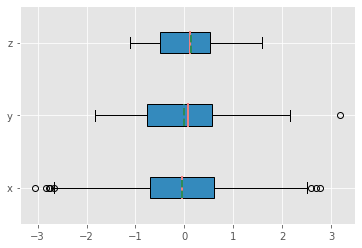

In [175]:
fig, ax = plt.subplots()
ax.boxplot((x,y,z), vert=False, showmeans=True, meanline=True, labels=('x','y','z'),
          patch_artist=True, medianprops={'linewidth':2, 'color':'lightcoral'}, 
           meanprops={'linewidth':2, 'color':'seagreen'})

plt.show()

### Histograms

In [176]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [177]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

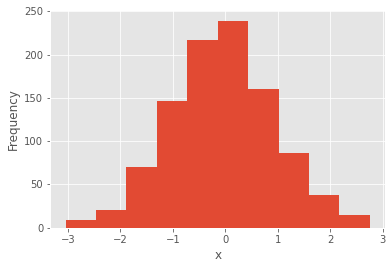

In [178]:
fig, ax= plt.subplots()
ax.hist(x,bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

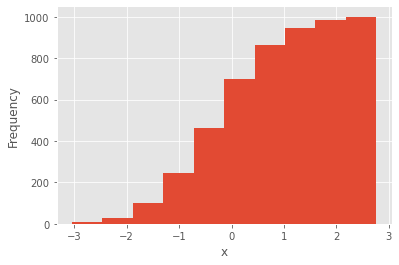

In [179]:
fig, ax= plt.subplots()
ax.hist(x,bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

### Pie Charts

In [180]:
x,y,z = 128,256,1024

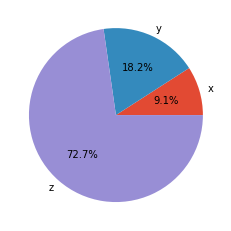

In [181]:
fig, ax= plt.subplots()
ax.pie((x,y,z), labels=('x','y','z'), autopct='%1.1f%%')

plt.show()

### Bar Charts

In [183]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

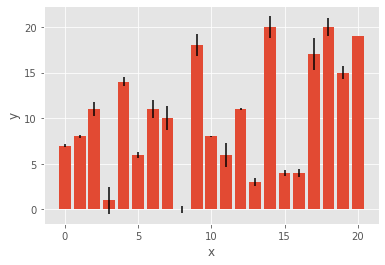

In [184]:
fig, ax= plt.subplots()
ax.bar(x,y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### X-Y Plots

In [186]:
x = np.arange(21)
y = 5+2*x+2*np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

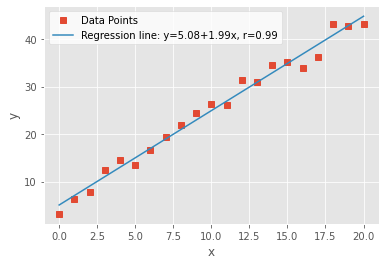

In [190]:
fig, ax= plt.subplots()
ax.plot(x,y, linewidth=0, marker='s',label='Data Points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### Heatmaps

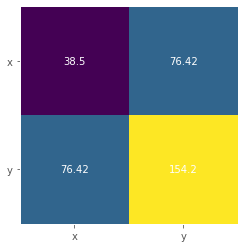

In [198]:
matrix = np.cov(x,y).round(decimals=2)
fig, ax= plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,matrix[i,j], ha='center',va='center',color='w')
        
plt.show()

Pada heatmaps di atas, kuning mewakili elemen terbesar dari matriks yaitu 154.2, ungu mewakili elemen terendah yaitu 38.5. Warna biru ada di tengah dengan nilai 76.42

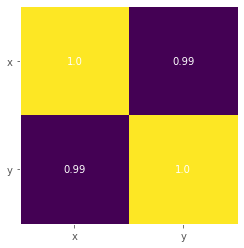

In [200]:
matrix = np.corrcoef(x,y).round(decimals=2)
fig, ax= plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,matrix[i,j], ha='center',va='center',color='w')
        
plt.show()

Pada heatmaps di atas, kuning bernilai 1 dan ungu bernilai 0.99